In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.stem import wordnet 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re

In [2]:
# instead of downloading from the url i have used sklearn datasets only
datasets = fetch_20newsgroups()

In [3]:
X = datasets.data
Y = datasets.target_names
print(datasets.target)
print(len(X), len(datasets.target))
print(f"There are {len(Y)} labelled classes in the target")

# i can go through the X and Y, instead i am converting it into dataframe so that i am doing from the scratch
# assuming the datasets from the url are like this 
datasets = pd.concat([pd.Series(X), pd.Series(datasets.target)], axis=1)
datasets.columns = ["text", "target"]

[7 4 4 ... 3 1 8]
11314 11314
There are 20 labelled classes in the target


In [84]:
xxxx = datasets

In [85]:
xxxx = xxxx.drop("cleaned_text", axis=1)


In [86]:
xxxx.to_csv("20_news_group.csv", index=False)

In [4]:
# each of these class are normally distrubiyted, there is no imbalance in the datasets
print(datasets["target"].value_counts(normalize = True) * 100)

10    5.303164
15    5.294326
8     5.285487
9     5.276648
11    5.258971
13    5.250133
7     5.250133
5     5.241294
14    5.241294
2     5.223617
12    5.223617
3     5.214778
6     5.170585
1     5.161747
4     5.108715
17    4.984974
16    4.825879
0     4.242531
18    4.109952
19    3.332155
Name: target, dtype: float64


In [5]:
#  getting to know about the texts with few records
top_3_records = datasets.iloc[0:3]["text"]

In [6]:
top_3_records

0    From: lerxst@wam.umd.edu (where's my thing)\nS...
1    From: guykuo@carson.u.washington.edu (Guy Kuo)...
2    From: twillis@ec.ecn.purdue.edu (Thomas E Will...
Name: text, dtype: object

In [7]:
top_3_records

0    From: lerxst@wam.umd.edu (where's my thing)\nS...
1    From: guykuo@carson.u.washington.edu (Guy Kuo)...
2    From: twillis@ec.ecn.purdue.edu (Thomas E Will...
Name: text, dtype: object

In [8]:
for text in top_3_records:
    print("RECORD_1 : ", end="")
    print(text)
    print("====" * 25)

RECORD_1 : From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





RECORD_1 : From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Pos

conclusion :  there seems to be lot of preprocessing needs to be done since it is having stopwords puncutaions etc..

In [9]:
# there few unwanted things in the datasets i need to remove on these best option would be slicing, 
# i have sliced the data and getting the data from Lines afterwards
def slicing_sentence(text):
    lines = text.split("\n")
    lines_index = next((index for index, line in enumerate(lines) if line.startswith("Lines")), None)

    if lines_index is not None:
        text = "\n".join(lines[lines_index:])
        return text
    else:
        return text

In [10]:
top_3_records = top_3_records.apply(slicing_sentence)
for text in top_3_records:
    print("RECORD_1 : ", end="")
    print(text)
    print("====" * 25)

RECORD_1 : Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





RECORD_1 : Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially reque

In [11]:
#do lower text
def lowercase_text(text): 
    return text.lower() 

# For Removing numbers 
def remove_num(text): 
    result = re.sub(r'\d+', '', text) 
    return result 

# let's remove punctuation 
def rem_punct(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 


# removing stopwords
nltk.download('stopwords')
nltk.download('punkt')
# remove stopwords function 
def rem_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = " ".join([word for word in word_tokens if word not in stop_words]) 
    return filtered_text 

# bring to to the root form of words
stem1 = PorterStemmer() 
# stem words in the list of tokenised words 
def s_words(text): 
    word_tokens = word_tokenize(text) 
    stems = " ".join([stem1.stem(word) for word in word_tokens]) 
    return stems 

# bring to to the root form of words which are much more meaningful, we can either make use of port stemmer or lemmetizer
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')
# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech(pos)
    lemmas = " ".join([lemma.lemmatize(word, pos ='v') for word in word_tokens]) 
    return lemmas 
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
clean_text = top_3_records.apply(lowercase_text)
clean_text = clean_text.apply(remove_num)
clean_text = clean_text.apply(rem_punct)

In [13]:
clean_text = clean_text.apply(rem_stopwords)
# clean_text = clean_text.apply(s_words)
clean_text = clean_text.apply(lemmatize_word)

In [14]:
for text in clean_text:
    print("RECORD_1 : ", end="")
    print(text)
    print("====" * 25)


RECORD_1 : line wonder anyone could enlighten car saw day door sport car look late early call bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car make history whatever info funky look car please email thank il bring neighborhood lerxst
RECORD_1 : line nntppostinghost carsonuwashingtonedu fair number brave souls upgrade si clock oscillator share experience poll please send brief message detail experience procedure top speed attain cpu rat speed add card adapters heat sink hour usage per day floppy disk functionality floppies especially request summarize next two days please add network knowledge base do clock upgrade havent answer poll thank guy kuo guykuouwashingtonedu
RECORD_1 : line well folks mac plus finally give ghost weekend start life k way back sooo im market new machine bite sooner intend im look pick powerbook maybe bunch question hopefully somebody answer anybody know dirt next round powerbook i

from this i got a clean text, we can use this for model but we need to prepare the input for the model

In [15]:
# Applying for the entire text data
# slicing_sentence
datasets["cleaned_text"] = datasets["text"].apply(slicing_sentence)
datasets["cleaned_text"] = datasets["cleaned_text"].apply(lowercase_text)
datasets["cleaned_text"] = datasets["cleaned_text"].apply(remove_num)
datasets["cleaned_text"] = datasets["cleaned_text"].apply(rem_punct)
datasets["cleaned_text"] = datasets["cleaned_text"].apply(rem_stopwords)
datasets["cleaned_text"] = datasets["cleaned_text"].apply(lemmatize_word)

In [16]:
datasets

,text,target,cleaned_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,line wonder anyone could enlighten car saw day...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,line nntppostinghost carsonuwashingtonedu fair...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,line well folks mac plus finally give ghost we...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,line distribution world nntppostinghost ambers...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,line article cowcbnpworldstdcom tombakerworlds...
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,line dn nyedacnsvaxuwecedu david nye dn neurol...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,line organization tufts university medford old...
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,line instal dx cpu clone motherboard try mount...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,line nntppostinghost hcrlgw article qkgbuinnsn...


In [17]:
data = datasets.loc[:, ["cleaned_text", "target"]]

In [18]:
for text in data[0:10]["cleaned_text"]:
    print(text)
    print("===" * 25)

line wonder anyone could enlighten car saw day door sport car look late early call bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car make history whatever info funky look car please email thank il bring neighborhood lerxst
line nntppostinghost carsonuwashingtonedu fair number brave souls upgrade si clock oscillator share experience poll please send brief message detail experience procedure top speed attain cpu rat speed add card adapters heat sink hour usage per day floppy disk functionality floppies especially request summarize next two days please add network knowledge base do clock upgrade havent answer poll thank guy kuo guykuouwashingtonedu
line well folks mac plus finally give ghost weekend start life k way back sooo im market new machine bite sooner intend im look pick powerbook maybe bunch question hopefully somebody answer anybody know dirt next round powerbook introductions expect id hear c sup

In [19]:
# line is one word which is of giving no importance so we can remove line 
# since it is at every starting point we can just use slicing menthod
data["cleaned_text"] = data["cleaned_text"].apply(lambda x : str(x[5:]))

In [20]:
for text in data[0:10]["cleaned_text"]:
    print(text)
    print("===" * 25)

wonder anyone could enlighten car saw day door sport car look late early call bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car make history whatever info funky look car please email thank il bring neighborhood lerxst
nntppostinghost carsonuwashingtonedu fair number brave souls upgrade si clock oscillator share experience poll please send brief message detail experience procedure top speed attain cpu rat speed add card adapters heat sink hour usage per day floppy disk functionality floppies especially request summarize next two days please add network knowledge base do clock upgrade havent answer poll thank guy kuo guykuouwashingtonedu
well folks mac plus finally give ghost weekend start life k way back sooo im market new machine bite sooner intend im look pick powerbook maybe bunch question hopefully somebody answer anybody know dirt next round powerbook introductions expect id hear c suppose make appea

this data we can use it for modelling but need to prepare data for model

In [21]:
data

,cleaned_text,target
0,wonder anyone could enlighten car saw day door...,7
1,nntppostinghost carsonuwashingtonedu fair numb...,4
2,well folks mac plus finally give ghost weekend...,4
3,distribution world nntppostinghost amberssdcsd...,1
4,article cowcbnpworldstdcom tombakerworldstdcom...,14
...,...,...
11309,dn nyedacnsvaxuwecedu david nye dn neurology d...,13
11310,organization tufts university medford old mac ...,4
11311,instal dx cpu clone motherboard try mount cpu ...,3
11312,nntppostinghost hcrlgw article qkgbuinnsnshell...,1


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(data.cleaned_text, data.target, test_size=0.3, random_state=43)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7919,)
(3395,)
(7919,)
(3395,)


In [24]:
# to get to know the frequency count of each word we can make use of count_vectoriser
freuency_term = CountVectorizer()

In [25]:
freuency_term.fit(X_train)
X_train_frequecy = freuency_term.transform(X_train)
X_test_frequecy = freuency_term.transform(X_test)

In [26]:
freuency_term.get_feature_names()[-500:-1]

['yuck',
 'yucky',
 'yuesea',
 'yuggothcescwruedu',
 'yugo',
 'yugoslavia',
 'yugoslavian',
 'yugoslavs',
 'yuhn',
 'yujen',
 'yuji',
 'yuk',
 'yukayuka',
 'yukf',
 'yukky',
 'yukon',
 'yulaev',
 'yumaacnscolostateedu',
 'yummy',
 'yunan',
 'yung',
 'yungrylehighedu',
 'yunis',
 'yunusova',
 'yup',
 'yuppie',
 'yuppies',
 'yuq',
 'yur',
 'yuri',
 'yuriatmoswashingtonedu',
 'yurikhmylev',
 'yuriukachwphy',
 'yurrruuu',
 'yuru',
 'yushkevich',
 'yushkevichcronin',
 'yushkevichhawgood',
 'yusuf',
 'yuv',
 'yuval',
 'yuz',
 'yv',
 'yva',
 'yvan',
 'yvaptavmviihjge',
 'yves',
 'yvggyr',
 'yvhavryvr',
 'yvon',
 'yvoncorriveau',
 'yw',
 'ywas',
 'ywid',
 'ywin',
 'ywlnmzc',
 'yws',
 'yx',
 'yxaccxszbhdg',
 'yxcysqqidnpczsy',
 'yxvevrumxjlglqnjsncryppumn',
 'yxyucsusledu',
 'yxyusledu',
 'yy',
 'yyb',
 'yyfssahfjaw',
 'yygwkglj',
 'yyqiecearizonaedu',
 'yyz',
 'yzazkyg',
 'yzerman',
 'yzermanfedorovprobert',
 'yzrdzo',
 'yzt',
 'yzwwstuv',
 'zaandam',
 'zabbal',
 'zabolotzky',
 'zach',
 'zachm

In [27]:
X_train_dense = X_train_frequecy.todense()
X_train_data = pd.DataFrame(X_train_dense, columns=freuency_term.get_feature_names())

X_test_dense = X_test_frequecy.todense()
X_test_data = pd.DataFrame(X_test_dense, columns=freuency_term.get_feature_names())

In [28]:
X_train_data.head()

,aa,aaa,aaaa,aaaaagggghhhh,aaah,aaahh,aaahhhh,aaalexlcsmitedu,aaamajors,aab,...,ère,èresalle,ée,égligent,élangea,érale,ête,íålittin,ñaustin,úz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# few of the columns are irrelavant
X_train_data = X_train_data.iloc[:, 150:-500]
X_test_data = X_test_data.iloc[:, 150:-500]

In [30]:
# fit the training dataset on the NB classifier
Naive = MultinomialNB()
Naive.fit(X_train_data,Y_train)

# predict the labels on train dataset
pred_train = Naive.predict(X_train_data)

# predict the labels on validation dataset
pred_test = Naive.predict(X_test_data)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score on Train set -> ", accuracy_score(Y_train, pred_train)*100)
print("Naive Bayes Accuracy Score on Validation set -> ", accuracy_score(Y_test, pred_test)*100)


Naive Bayes Accuracy Score on Train set ->  93.92600075767142
Naive Bayes Accuracy Score on Validation set ->  83.26951399116348


In [31]:
for i in confusion_matrix(y_true=Y_test, y_pred=pred_test):
    for j in i:
        print(j, end="    ")
    print()

120    0    0    0    0    0    0    1    0    0    0    0    0    0    0    8    1    5    1    2    
2    135    0    12    1    10    0    0    0    0    0    5    0    2    5    3    1    0    0    1    
1    10    97    31    0    23    1    0    0    0    1    12    1    1    1    1    2    0    0    0    
0    7    2    142    2    3    2    0    0    0    0    4    1    0    0    0    0    0    0    0    
0    6    0    22    136    1    4    4    0    0    0    5    5    2    1    0    0    0    0    0    
0    7    0    1    0    156    0    0    0    1    0    4    0    0    1    0    1    2    1    0    
0    4    0    22    3    1    86    11    0    2    1    10    12    3    7    0    2    2    3    0    
0    1    0    1    0    0    0    134    1    1    0    4    2    0    1    1    6    1    1    0    
0    0    0    0    1    0    2    6    157    0    0    2    0    1    0    0    3    1    1    0    
0    3    0    0    0    0    0    0    0    167    1    1    0 

In [32]:
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       138
           1       0.73      0.76      0.75       177
           2       0.98      0.53      0.69       182
           3       0.58      0.87      0.70       163
           4       0.94      0.73      0.82       186
           5       0.80      0.90      0.84       174
           6       0.88      0.51      0.64       169
           7       0.82      0.87      0.85       154
           8       0.99      0.90      0.95       174
           9       0.95      0.97      0.96       173
          10       0.98      0.96      0.97       190
          11       0.72      0.94      0.81       182
          12       0.86      0.72      0.78       188
          13       0.91      0.94      0.92       170
          14       0.89      0.94      0.92       197
          15       0.74      0.95      0.83       166
          16       0.76      0.98      0.86       170
          17       0.85    

seems to be model fairly doing a good job, This can further be improved by adding bigram and trigram words in the above approach used only unigram approach gridserach cv etc

# Building Own Naive bayes classifier

In [33]:
data

,cleaned_text,target
0,wonder anyone could enlighten car saw day door...,7
1,nntppostinghost carsonuwashingtonedu fair numb...,4
2,well folks mac plus finally give ghost weekend...,4
3,distribution world nntppostinghost amberssdcsd...,1
4,article cowcbnpworldstdcom tombakerworldstdcom...,14
...,...,...
11309,dn nyedacnsvaxuwecedu david nye dn neurology d...,13
11310,organization tufts university medford old mac ...,4
11311,instal dx cpu clone motherboard try mount cpu ...,3
11312,nntppostinghost hcrlgw article qkgbuinnsnshell...,1


In [34]:
data["tokenized_text"] = data["cleaned_text"].apply(lambda x : word_tokenize(x))

In [35]:
data.head()

,cleaned_text,target,tokenized_text
0,wonder anyone could enlighten car saw day door...,7,"[wonder, anyone, could, enlighten, car, saw, d..."
1,nntppostinghost carsonuwashingtonedu fair numb...,4,"[nntppostinghost, carsonuwashingtonedu, fair, ..."
2,well folks mac plus finally give ghost weekend...,4,"[well, folks, mac, plus, finally, give, ghost,..."
3,distribution world nntppostinghost amberssdcsd...,1,"[distribution, world, nntppostinghost, amberss..."
4,article cowcbnpworldstdcom tombakerworldstdcom...,14,"[article, cowcbnpworldstdcom, tombakerworldstd..."


In [48]:
data["length"] = data["tokenized_text"].apply(lambda x : len(x))
data["length"].max()

6628

Max sentece in the documents is 6628, so we can restric the frequency matrix to this length

In [51]:
data = data.loc[:, ["tokenized_text", "target"]]
x_train, x_test, y_train, y_test = train_test_split(data.tokenized_text, data.target, test_size = 0.3, random_state = 43)

In [52]:
tokens = []
for index, row in data.iterrows():
    tokens.extend(row["tokenized_text"])
print(len(tokens))

1582329


In [53]:
def freq_dict(all_words):
    dic=dict()
    for word in all_words:
        if word in dic.keys():
            dic[word]+=1
        else:
            dic[word]=1
    return dic

dic=freq_dict(tokens)
print(len(dic))

103856


In [54]:
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])

words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]

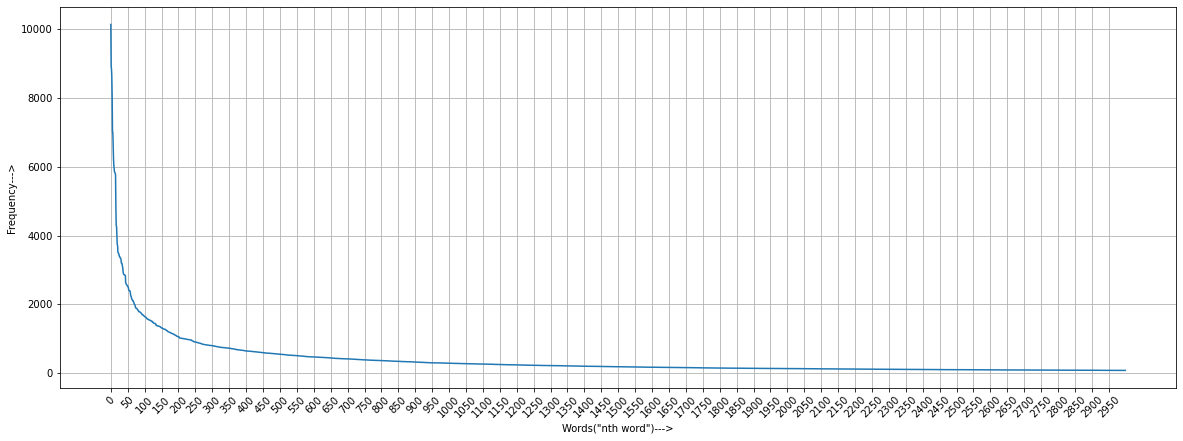

In [55]:
#This cell draws a frequency distribution graph for us to from where we can carefully observe the frequency trend of out list.
import matplotlib.pyplot as plt
#following are the limits for our graph.
lower_limit=0    #default
upper_limit=3000    #default
difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()

In [56]:
features=words[20:6500] # max words in one of the document is 6k so we are restricting the feature to this length

In [58]:
# term_frequency_matrix = np.zeros((data.shape[0], len(features)), dtype = "int")

In [59]:
term_frequency_matrix.shape

(11314, 6480)

In [70]:
def frequency_matrix(x_data, features):
    term_frequency_matrix = np.zeros((len(x_data), len(features)))
    #modified_data currently have a ZEROS numpy array whose shape is (len(x_data), len(features))
    for i in range(len(x_data)):
        #looping over each and every row in the x_data
        current_doc=x_data.iloc[i]
        #current_doc contains the current document on which we are iterating.(As the name suggests obviously)
        for word in current_doc:
            #looping over each word in the current document
            if word in features:
                #whenever I am finding a perticular word in the features list...
                for j in range(len(features)):
                    #I am increasing the value of modified[i][j] to the number of times that word is present in the features list.
                    if features[j]==word:
                        term_frequency_matrix[i][j]+=1
    #finally I have returned the modified array.
    return term_frequency_matrix 
            

In [71]:
x_train_modified = frequency_matrix(x_train, features)
x_test_modified= frequency_matrix(x_test, features)

# Using Inbuild Multinomial Naive bayes

In [72]:
# first trying out the inbuilt Multinomial naive bayes classifier.
clf=MultinomialNB()
clf.fit(x_train_modified, y_train)
clf.score(x_test_modified, y_test)
#it seems like a

0.8229749631811487

In [73]:
#fit function takes the training data and gives you a dictionary whose keys are the different classes available to classify.
# and for each key, value is another dictionary, whose keys are all the features available to us and value corresponding
# to each key is sum of all the row of training data corresponding to the current class.(the original key or (say) primary key)
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        #these are all the documents we need to work upon corresponding to the class i.
        count[i]=dict()
        #count is a dictionary whose each key is yet another dictionary.
        count[i]['total']=0
        #it will maintain the total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            #it gives me-"how many times jth feature is coming corresponding to class i"
            count[i]['total']+=count[i][features[j]]
            #this additional key named "total" stores the sum of all the values of ith key which signifies the total number of
            # words in class i.
    #returning the dictionary at last.
    return count

#this "probability" function is another backbone of our naive bayes classifier.But before this function please ckeck out 
#predict function given below.
#This "Predict" function takes takes the dictionary, which was originally returned by fit function, the current data point and the current class as its params.
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    #my plan, here, is to store all the probabilities for each word in features which is available in the current document
    # and then return the logarithmic sum of all these probabilities for that perticular document.
    for i in range(len(x)):
        #iterating through each feature.
        if x[i]!=0:
            #I am skipping those features whose value corresponding to the current document is 0, that is, they are not present
            # in the that document.
            numerator=dictionary[current_class][features[i]]
            #it denotes that how many times that ith feature is occuring in "current_class"
            #this is the numerator of our NON LOGARITHMIC PROBABILITY
            denominator=dictionary[current_class]['total']
            #it denotes that what is the total number of words in the current class.
            #this is the denominator of our NON LOGARITHMIC PROBABILITY
            proba=np.log((numerator+1)/(denominator+len(x)))
            #i have created a variable "proba" which stores the logarithmic probability which also includes the laplace crrection.
            #here "1" with the numerator and len(x) with denominator denotes the laplace correction.
            probas_for_each_word.append(proba)
            #finally i appended "proba" to the probas_for_each_word array.
    #returning the logarithmic sum of all the probabilities. (which can be treated as multiplication of all the probabilities,
    #but multiplying the probabilities simply won't be a good practice as it may nullify the extreamily small probabilities)
    return sum(probas_for_each_word)

#The predict_single function takes a perticular data point "x" from "predict" function and a dictionary which was obtained
#originally from fit function. Before going through this function, you may like to check out the "predict" function.
def predict_single(dic, x):
    classes = dictionary.keys()
    #this variable "classes" maintains all the possible different classes available to us.
    best_p = -1000
    best_class = -1
    #initiated best_p and best_class variables with negative values because we want to consider maximum valued probabilities at
    #the end. In the first run itself they will be replaced by positive values. "best_p" variable denotes the best probability
    #uptill now. and as the name suggests, best_class denotes the best possible class uptill now.
    first_run = True
    #this boolean variable is taken keeping initial negative values in mind
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            #if the probability of current class is better than the best probability then i will update the best probability and
            # best_class to probability of current class and the current class respectively.
            best_p = p_current_class
            best_class = current_class
            #updated
        first_run = False
    #returning the best predicted class for the current data point
    return best_class

#The predict function takes testing data and a dictionary as its input, where the dictionary is the one returned from fit function.
def predict(x_test, dic):
    y_pred=[]
    #y_pred maintains all the predicted classes for provided testing data(In modified format---> see the "data_modifier" function).
    for doc in x_test:
        #iterating each document in testing data.
        y_pred.append(predict_single(dic, doc))
        #for each testing data point, we will append the value of predicted class to y_pred. and we will get that value from
        #predict_single function
    #returning the predicted data finally
    return y_pred


In [75]:
dictionary=fit(x_train_modified, y_train)
#calling the fit function for the modified data.

In [76]:
y_predicted=predict(x_test_modified, dictionary)
#storing the predicted values.

In [77]:
from sklearn.metrics import confusion_matrix
#printing the confusion matrix for our own naive bayes classifier.
#here i am manually printing the confusion matrix for a more clear view.
for i in confusion_matrix(y_true=y_test, y_pred=y_predicted):
    for j in i:
        print(j, end="    ")
    print()

117    0    0    0    0    0    0    2    1    0    0    0    0    1    0    12    1    0    2    2    
0    133    12    14    4    7    0    0    0    1    0    3    1    0    0    0    1    0    0    1    
0    14    131    25    1    7    0    1    0    0    0    0    1    0    0    1    0    0    0    1    
0    9    13    129    6    1    3    2    0    0    0    0    0    0    0    0    0    0    0    0    
1    5    6    18    149    0    2    3    0    0    0    0    1    1    0    0    0    0    0    0    
0    20    7    1    2    136    1    0    0    1    0    2    0    0    0    0    0    0    3    1    
0    3    4    18    7    0    110    10    1    1    2    3    5    0    2    0    1    1    0    1    
0    2    0    2    0    0    2    130    5    2    0    2    5    0    0    1    1    0    2    0    
0    2    0    0    1    1    3    19    143    2    0    0    0    0    0    0    2    0    1    0    
0    4    1    1    0    0    1    0    0    163    1    0    

In [78]:
print(classification_report(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       138
           1       0.61      0.75      0.67       177
           2       0.72      0.72      0.72       182
           3       0.55      0.79      0.65       163
           4       0.80      0.80      0.80       186
           5       0.88      0.78      0.83       174
           6       0.83      0.65      0.73       169
           7       0.72      0.84      0.78       154
           8       0.93      0.82      0.87       174
           9       0.85      0.94      0.89       173
          10       0.98      0.90      0.94       190
          11       0.82      0.91      0.86       182
          12       0.86      0.63      0.72       188
          13       0.96      0.85      0.90       170
          14       0.95      0.80      0.87       197
          15       0.72      0.93      0.81       166
          16       0.84      0.92      0.88       170
          17       0.97    

Model fairly done a good jon